In [1]:
from textblob import TextBlob
from afinn import Afinn
import random
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 20, 10
import scipy

In [2]:
def senticuml(filename, method='afinn', show_sample=False):
    with open (filename, "r") as myfile:
        text=myfile.read().replace('\n', ' ')   

        blob = TextBlob(text)       

        tot = 0.0
        sent = []
        cuml = []
        i = 0
        for sentence in blob.sentences:
            if method == 'afinn':
                afinn = Afinn()
                senti = afinn.score(str(sentence))
            elif method == 'random':
                senti = random.uniform(-1,1)
            else:
                senti = sentence.sentiment.polarity
            sent.append(senti)
            tot = tot + senti
            cuml.append(tot)
            i += 1
            if i > 100 and i < 110 and show_sample:
                print(tot, senti, sentence[0:40])
                
        return sent, cuml

In [3]:
scipy.__version__

'0.17.0'

In [4]:
def sentiplot(filename, title, use_cuml=True, method='afinn'):
    fig = plt.figure()
    sent, cuml = senticuml(filename, method=method)
    if use_cuml == True:
        plt.plot(cuml,label=title)
        plt.ylabel("Cumulative Emotional Valence")
        plt.xlabel("Sentence #")
    else:
        plt.plot(sent,label=title)
        plt.ylabel("Emotional Valence")
        plt.xlabel("Sentence #")
    plt.legend()

In [5]:
import sys
reload(sys)
sys.setdefaultencoding("utf-8")

In [ ]:
sentiplot('pg4217.txt', "A Portrait of the Artist as a Young Man",use_cuml=False)

In [ ]:
sentiplot('pg4217.txt', "A Portrait of the Artist as a Young Man",use_cuml=True)

In [6]:
sent, cuml = senticuml('pg4217.txt', method='afinn')

In [233]:
len(sent)

5490

In [8]:
import numpy as np

In [234]:
s = np.array(sent)

In [235]:
s.shape

(5490L,)

In [12]:
from scipy.signal import spectrogram

In [13]:
f,t,Sxx= spectrogram(s,fs=1,scaling='spectrum',nperseg=64)

In [ ]:
spectrogram?

In [ ]:
Sxx.shape

In [ ]:
f.shape

In [ ]:
t.shape

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Position in the book')

In [ ]:
import matplotlib

In [ ]:
matplotlib.__version__

In [15]:
import colormaps as cmaps

In [ ]:
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Position in the book')

In [ ]:
spectrogram?

In [ ]:
f,t,Sxx= spectrogram(cuml,fs=1,scaling='spectrum',nperseg=128)

In [ ]:
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Position in the book')

In [ ]:
Sxx

In [ ]:
scaled = (Sxx- np.mean(Sxx))/np.std(Sxx)

<matplotlib.colorbar.Colorbar instance at 0x0000000040EA0508>

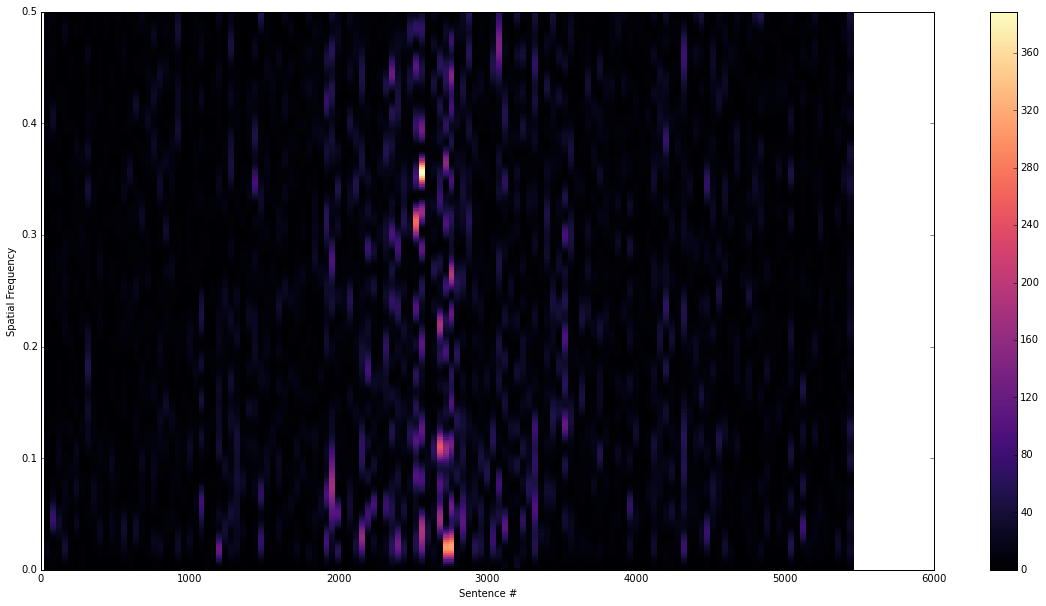

In [236]:
f,t,Sxx= spectrogram(s,fs=1,nperseg=45,nfft=512,mode='psd')
#plt.plot(sent)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Spatial Frequency')
plt.xlabel('Sentence #')
plt.colorbar()
#plt.xlim(40,4500)

In [237]:
pos = s.copy()
pos[pos<0] = 0
neg = s.copy()
neg[neg>0] = 0

<matplotlib.colorbar.Colorbar instance at 0x0000000041F42488>

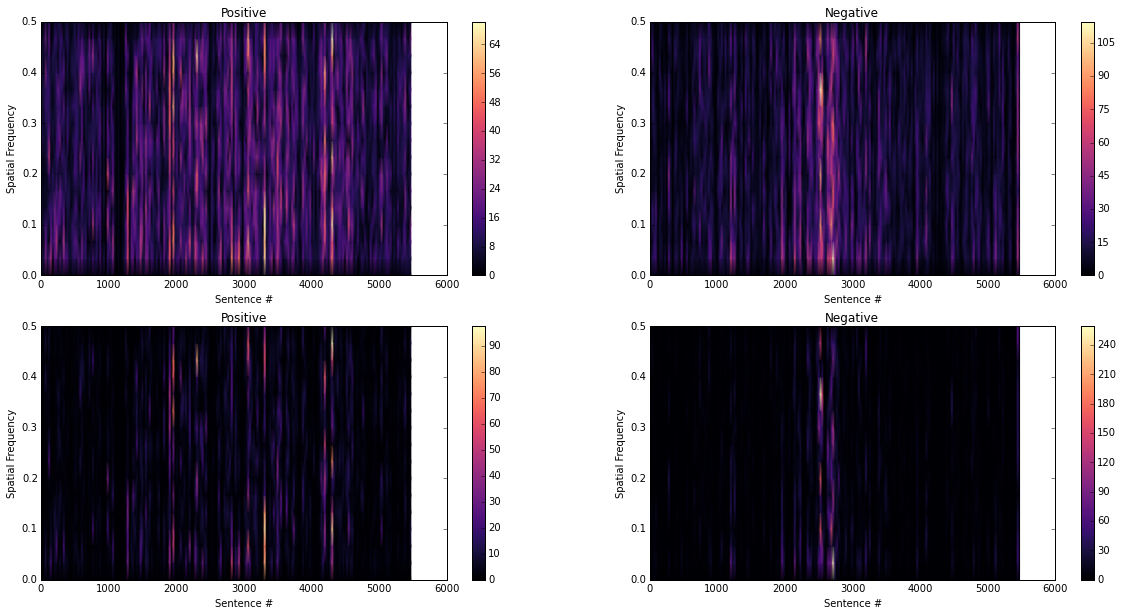

In [238]:
plt.subplot(2,2,1)
f,t,Sxx= spectrogram(pos,fs=1,nperseg=30,mode='magnitude')
plt.pcolormesh(t, f, Sxx,shading='gouraud')
plt.title('Positive')
plt.ylabel('Spatial Frequency')
plt.xlabel('Sentence #')
plt.colorbar()
plt.subplot(2,2,2)
f,t,Sxx= spectrogram(neg,fs=1,nperseg=30,mode='magnitude')
plt.pcolormesh(t, f, Sxx,shading='gouraud')
plt.title('Negative')
plt.ylabel('Spatial Frequency')
plt.xlabel('Sentence #')
plt.colorbar()
plt.subplot(2,2,3)
f,t,Sxx= spectrogram(pos,fs=1,nperseg=30,mode='psd')
plt.pcolormesh(t, f, Sxx,shading='gouraud')
plt.title('Positive')
plt.ylabel('Spatial Frequency')
plt.xlabel('Sentence #')
plt.colorbar()
plt.subplot(2,2,4)
f,t,Sxx= spectrogram(neg,fs=1,nperseg=30,mode='psd')
plt.pcolormesh(t, f, Sxx,shading='gouraud')
plt.title('Negative')
plt.ylabel('Spatial Frequency')
plt.xlabel('Sentence #')
plt.colorbar()

In [36]:
sum(Sxx<0)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
plt.colorbar?

In [ ]:
scipy.__version__

In [ ]:
from scipy.signal import get_window

In [20]:
plt.pcolormesh?

In [ ]:
f.shape

In [ ]:
Sxx.shape

In [ ]:
t.shape

In [ ]:
f

In [ ]:
t

In [ ]:
np.argmax(Sxx,axis=1)

In [ ]:
np.min(Sxx)

In [ ]:
Sxx.shape

In [ ]:
np.argmax?

In [ ]:
a = np.empty(5000)

In [ ]:
a[0:1000] =np.linspace(10,20,1000)
a[1000:2000] =np.linspace(20,30,1000)
a[2000:3000] = 0
a[3000:4000] = np.linspace(-10,-20,1000)
a[4000:5000] = np.linspace(-20,-30,1000)

In [ ]:
f,t,Sxx= spectrogram(a,fs=1,nperseg=45,nfft=512)
#plt.plot(sent)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Spatial Frequency')
plt.xlabel('Sentence #')
plt.colorbar()
plt.xlim(40,4500)

In [22]:
Sxx

array([[  3.76729392 +0.j        ,   7.27335778 +0.j        ,
         -4.95308181 +0.j        , ...,   4.69283263 +0.j        ,
          9.29986763 +0.j        ,  18.25214437 +0.j        ],
       [  8.81539431 +3.97423206j,  12.51816563 -8.6827946j ,
        -10.17591587 +0.80599875j, ...,   7.81983348 -6.30658289j,
         20.15807083 +1.67067941j,  31.95812558-21.55478701j],
       [ 12.38219437 +6.75954222j,   6.89583608-15.50508377j,
        -10.80284723 +2.14196794j, ...,   3.45664383-11.20202284j,
         24.21789274 +1.30059596j,  19.09820485-39.4780432j ],
       ..., 
       [-13.64896215-18.40897039j,  22.60094939+17.5746588j ,
         -8.09815192 -4.34945526j, ...,  -1.57277742-11.9708677j ,
        -33.31391978-41.04811301j, -37.17024975-14.92966452j],
       [-20.04799489-10.18509232j,  28.26090093 +9.63721795j,
         -8.87209667 -2.22868929j, ...,  -6.55041065 -6.78580481j,
        -48.35181613-22.98542959j, -41.57742372 -8.18569339j],
       [-11.16491010 +0.j  

In [94]:
f,t,Sxx= spectrogram(s,fs=1,nperseg=30,nfft=512,mode='magnitude')
#plt.plot(sent)
plt.pcolormesh(t, f, Sxx,shading='gouraud')
plt.ylabel('Spatial Frequency')
plt.xlabel('Sentence #')
plt.colorbar()
plt.xlim(40,4500)

(40, 4500)

In [59]:
plt.pcolormesh?

In [66]:
Sxx

array([[  3.76729392,   7.27335778,   4.95308181, ...,   4.69283263,
          9.29986763,  18.25214437],
       [  9.6698344 ,  15.23467731,  10.20778613, ...,  10.04603322,
         20.22718441,  38.5477708 ],
       [ 14.10709568,  16.96938944,  11.01315282, ...,  11.72321211,
         24.25279115,  43.8549578 ],
       ..., 
       [ 22.91690115,  28.62990648,   9.19226989, ...,  12.07374434,
         52.8655354 ,  40.05648947],
       [ 22.48684515,  29.85890975,   9.14774044, ...,   9.43159725,
         53.53716556,  42.37555592],
       [ 11.1649101 ,  15.1376952 ,   4.56576031, ...,   4.16622431,
         26.88203335,  21.58272713]])

In [85]:
Sxx.shape

(257L, 203L)

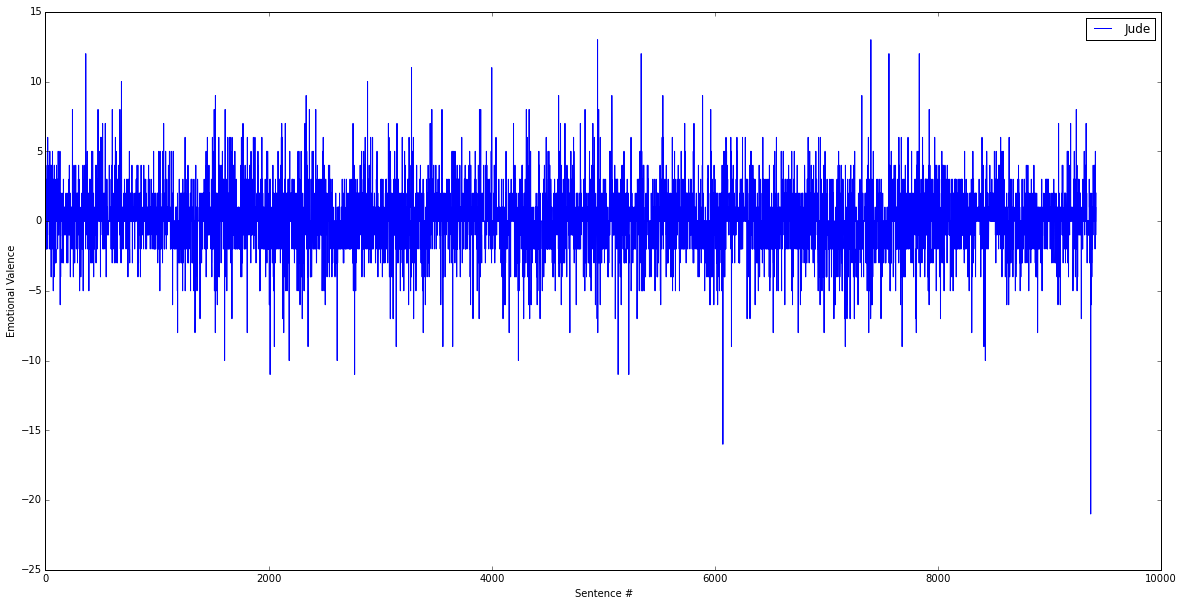

In [96]:
sentiplot('pg153.txt', "Jude",use_cuml=False)

In [97]:
f,t,Sxx= spectrogram(s,fs=1,nperseg=30,nfft=512,mode='magnitude')


In [107]:
pos = s.copy()

In [108]:
pos[pos<0] = 0

In [110]:
pos.shape

(5490L,)

In [111]:
s.shape

(5490L,)

In [112]:
f,t,Sxx= spectrogram(pos,fs=1,nperseg=30,nfft=512,mode='magnitude')
#plt.plot(sent)
plt.pcolormesh(t, f, Sxx,shading='gouraud')
plt.ylabel('Spatial Frequency')
plt.xlabel('Sentence #')
plt.colorbar()
plt.xlim(40,4500)

(40, 4500)

In [113]:
neg = s.copy()

In [114]:
neg[neg>0] = 0

(40, 4500)

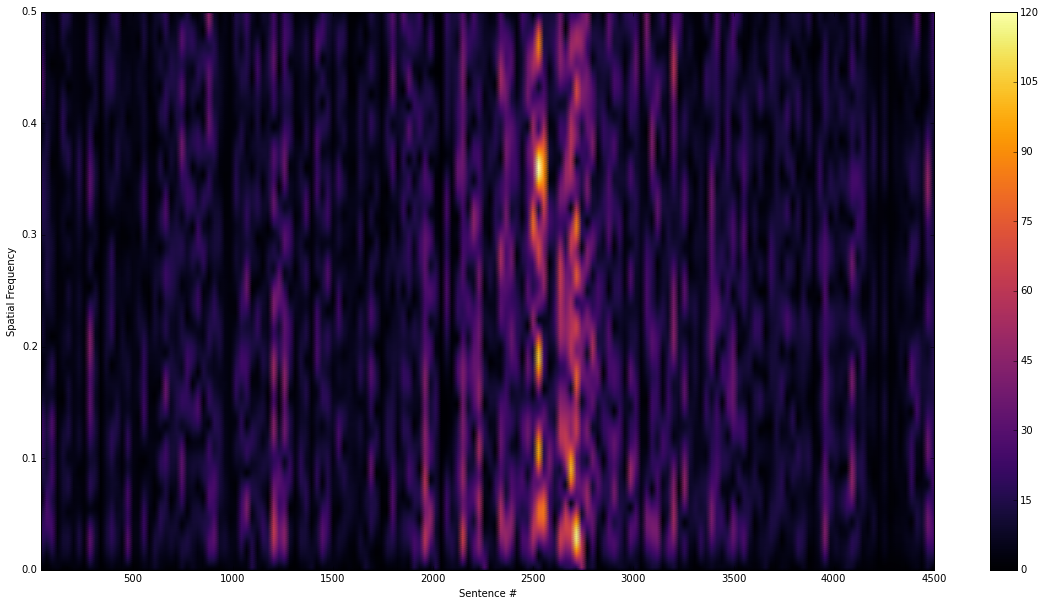

In [115]:
f,t,Sxx= spectrogram(neg,fs=1,nperseg=30,nfft=512,mode='magnitude')
#plt.plot(sent)
plt.pcolormesh(t, f, Sxx,shading='gouraud')
plt.ylabel('Spatial Frequency')
plt.xlabel('Sentence #')
plt.colorbar()
plt.xlim(40,4500)

In [186]:
plt.subplot(2,1,1)
f,t,Sxx= spectrogram(pos,fs=1,nperseg=30,nfft=512,mode='magnitude')
plt.pcolormesh(t, f, Sxx)
plt.title('Positive')
plt.ylabel('Spatial Frequency')
plt.xlabel('Sentence #')
plt.colorbar()
plt.xlim(40,4500)
plt.subplot(2,1,2)
f,t,Sxx= spectrogram(neg,fs=1,nperseg=30,nfft=512,mode='magnitude')
plt.pcolormesh(t, f, Sxx)
plt.title('Negative')
plt.ylabel('Spatial Frequency')
plt.xlabel('Sentence #')
plt.colorbar()
plt.xlim(40,4500)

(40, 4500)

In [134]:
Sxx

array([[  0.62593086,   1.69318954,   0.19170017, ...,   2.44210004,
          3.58493765,   1.34881507],
       [  1.64634291,   3.41067861,   0.56652357, ...,   4.95375949,
          7.22180697,   3.16183291],
       [  2.46521373,   3.48214177,   1.00466959, ...,   5.15532197,
          7.37170594,   4.23431152],
       ..., 
       [  2.10254351,   2.85644207,  15.47684057, ...,   2.47635539,
         10.53168888,   7.00877775],
       [  2.03488199,   2.66076859,  15.54751805, ...,   1.36438024,
         10.63119931,   5.4425068 ],
       [  1.00589299,   1.2958923 ,   7.78646352, ...,   0.31608858,
          5.33220811,   2.39845539]])

In [141]:
sentlol, cumllol = senticuml('lo.txt', method='afinn')

In [174]:
len(sentlol)

4798

In [144]:
s = np.array(sentlol)

In [145]:
pos = s.copy()
pos[pos<0] = 0

In [146]:
neg = s.copy()
neg[neg>0] = 0

In [187]:
plt.subplot(2,1,1)
f,t,Sxx= spectrogram(pos,fs=1,nperseg=50,nfft=256,mode='magnitude')
plt.pcolormesh(t, f, Sxx,shading='gouraud')
plt.title('Positive')
plt.ylabel('Spatial Frequency')
plt.xlabel('Sentence #')
plt.colorbar()
plt.subplot(2,1,2)
f,t,Sxx= spectrogram(neg,fs=1,nperseg=50,nfft=256,mode='magnitude')
plt.pcolormesh(t, f, Sxx,shading='gouraud')
plt.title('Negative')
plt.ylabel('Spatial Frequency')
plt.xlabel('Sentence #')
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x000000002D210148>

In [149]:
sum(s<0)

1312

In [150]:
sum(s>0)

1519

In [155]:
neg.shape

(4798L,)

In [156]:
sum(s==0)

1967

In [157]:
sentss, cumlss= senticuml('161.txt', method='afinn')

In [175]:
len(sentss)

4953

In [231]:
r = np.array(sentlol)
pos = r.copy()
pos[pos<0] = 0
neg = r.copy()
neg[neg>0] = 0

In [232]:
plt.subplot(2,2,1)
f,t,Sxx= spectrogram(pos,fs=1,nperseg=30,mode='magnitude')
plt.pcolormesh(t, f, Sxx,shading='gouraud')
plt.xlim()
plt.title('Positive')
plt.ylabel('Spatial Frequency')
plt.xlabel('Sentence #')
plt.colorbar(10,)
plt.subplot(2,2,2)
f,t,Sxx= spectrogram(neg,fs=1,nperseg=30,mode='magnitude')
plt.pcolormesh(t, f, Sxx,shading='gouraud')
plt.title('Negative')
plt.ylabel('Spatial Frequency')
plt.xlabel('Sentence #')
plt.colorbar()
plt.subplot(2,2,3)
f,t,Sxx= spectrogram(pos,fs=1,nperseg=30,mode='psd')
plt.pcolormesh(t, f, Sxx,shading='gouraud')
plt.title('Positive')
plt.ylabel('Spatial Frequency')
plt.xlabel('Sentence #')
plt.colorbar()
plt.subplot(2,2,4)
f,t,Sxx= spectrogram(neg,fs=1,nperseg=30,mode='psd')
plt.pcolormesh(t, f, Sxx,shading='gouraud')
plt.title('Negative')
plt.ylabel('Spatial Frequency')
plt.xlabel('Sentence #')
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x0000000040D42CC8>

In [164]:
sum(s==0)

1967

In [188]:
sentrj, cumlrj= senticuml('pg1112.txt', method='afinn')

In [244]:
r = np.array(sentrj)
pos = r.copy()
pos[pos<0] = 0
neg = r.copy()
neg[neg>0] = 0

<matplotlib.colorbar.Colorbar instance at 0x00000000482F3788>

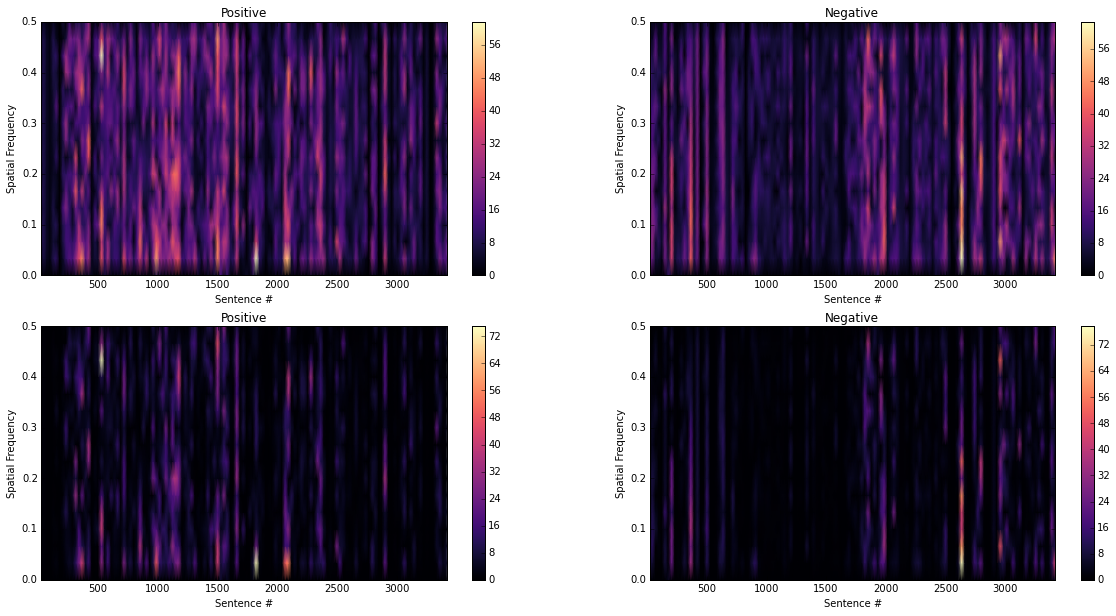

In [250]:
plt.subplot(2,2,1)
f,t,Sxx= spectrogram(pos,fs=1,nperseg=30,mode='magnitude')
plt.pcolormesh(t, f, Sxx,shading='gouraud')
plt.xlim(20,3420)
plt.title('Positive')
plt.ylabel('Spatial Frequency')
plt.xlabel('Sentence #')
plt.colorbar()
plt.subplot(2,2,2)
f,t,Sxx= spectrogram(neg,fs=1,nperseg=30,mode='magnitude')
plt.pcolormesh(t, f, Sxx,shading='gouraud')
plt.xlim(20,3420)
plt.title('Negative')
plt.ylabel('Spatial Frequency')
plt.xlabel('Sentence #')
plt.colorbar()
plt.subplot(2,2,3)
f,t,Sxx= spectrogram(pos,fs=1,nperseg=30,mode='psd')
plt.pcolormesh(t, f, Sxx,shading='gouraud')
plt.xlim(20,3420)
plt.title('Positive')
plt.ylabel('Spatial Frequency')
plt.xlabel('Sentence #')
plt.colorbar()
plt.subplot(2,2,4)
f,t,Sxx= spectrogram(neg,fs=1,nperseg=30,mode='psd')
plt.xlim(20,3420)
plt.pcolormesh(t, f, Sxx,shading='gouraud')
plt.title('Negative')
plt.ylabel('Spatial Frequency')
plt.xlabel('Sentence #')
plt.colorbar()

In [195]:
sum(r==0)

2302

In [197]:
plt.pcolormesh?

In [205]:
spectrogram?

In [246]:
r.shape

(3453L,)